# Price Optimisation based on price elasticity of Demand

**Price optimisation** is the use of analysis by a company to understand how their customers will respond to different prices of their product on differnt channels(offline/online).

1. Price optimisation is required in:
    * Retail
    * Airlines
    * Banking
    * Hotel
2. People that needs pricing:
    * Analyst or business owners
3. Strategies to price products
    * Cost plut pricing
    * Competition based pricing
    * Perceived value based pricing
    * Demand based pricing
    * Price elasticity of product
4. What should I price my products?
    * Sales
    * Revenue
    * Profit
    * Footfall
5. how can I price my products with the sales data I have?
    * Sales data
         * Property - Price elasticity
         * elastic - patterns change based on their price.
         * inelastic - products whose sales are not affected by price changes
         
**Price elasticity of demand (PED), or elasticity**, is the degree to which the effective desire for something changes as its price changes. In general, people desire things less as those things become more expensive. However, for some products, the customer's desire could drop sharply even with a little price increase, and for other products, it could stay almost the same even with a big price increase. Economists use the term elasticity to denote this sensitivity to price increases. More precisely, price elasticity gives the percentage change in quantity demanded when there is a one percent increase in price, holding everything else constant.

Mathematically speaking, the **PED** is defined to be the percentage change in quantity demanded, **q**,divided by the percentage change in price, **p**. The formula for the price elasticity (ǫ) is: $$e = \%ΔQ/ \%ΔP$$

In this work, we shall look at the sales of the items of a cafe. This cafe sells burgers, coke, lemonade and coffee. As a data scientist, it is our task to figure out the optimal prices to set for these items. If the price is set too high, the sales will drop & the price is set to low, then the margins will decrease. What is the sweet spot that will give us the maximum profit?

### Sold Info - Cafe_Sell_Meta_Data.csv
SELL_ID: a categorical variable, identifier of the combination of items that is contained in the product.

SELL_CATEGORY: “0” identifies single products; the category “2” identifies the combo ones.

ITEM_ID: a categorical variable, identifier of the item that is contained in the product.

ITEM_NAME: a categorical variable, identifying the name of the item

## Transactions Info - Cafe_Transaction_Store.csv

Important: It’s supposed the PRICE for that product in that day will not vary.

In details:
CALENDAR_DATE: a date/time variable, having the time always set to 00:00 AM.

PRICE: a numeric variable, associated with the price of the product identified by the SELL_ID.

QUANTITY: a numeric variable, associated with the quantity of the product sold, identified by the SELL_ID.

SELL_ID: a categorical variable, identifier of the product sold.

SELL_CATEGORY: a categorical variable, category of the product sold.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols

## Get multiple outputs in the same cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Ignore all warnings
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings(action='ignore', category=DeprecationWarning)

In [2]:
## Display all rows and columns of a dataframe instead of a truncated version
from IPython.display import display
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
# Load the data
    
sold = pd.read_csv("Cafe_Sell_Meta_Data.csv")
transactions = pd.read_csv("Cafe_Transaction_Store.csv")
date_info = pd.read_csv("Cafe_DateInfo.csv")

In [4]:
sold.head()

,SELL_ID,SELL_CATEGORY,ITEM_ID,ITEM_NAME
0,1070,0,7821,BURGER
1,3055,0,3052,COFFEE
2,3067,0,5030,COKE
3,3028,0,6249,LEMONADE
4,2051,2,7821,BURGER


In [5]:
sold.describe()

,SELL_ID,SELL_CATEGORY,ITEM_ID
count,11.000000,11.000000,11.000000
mean,2235.000000,1.272727,5906.909091
std,598.728653,1.009050,1830.217170
min,1070.000000,0.000000,3052.000000
25%,2051.500000,0.000000,5030.000000
50%,2053.000000,2.000000,6249.000000
75%,2540.500000,2.000000,7821.000000
max,3067.000000,2.000000,7821.000000


In [6]:
sold.describe(include=['O'])

,ITEM_NAME
count,11
unique,4
top,BURGER
freq,4


In [7]:
sold.shape

(11, 4)

In [8]:
sold.isnull().any()

SELL_ID          False
SELL_CATEGORY    False
ITEM_ID          False
ITEM_NAME        False
dtype: bool

In [9]:
sold.SELL_CATEGORY.value_counts()

2    7
0    4
Name: SELL_CATEGORY, dtype: int64

In [10]:
sold.ITEM_NAME.value_counts()

BURGER      4
COKE        3
COFFEE      2
LEMONADE    2
Name: ITEM_NAME, dtype: int64

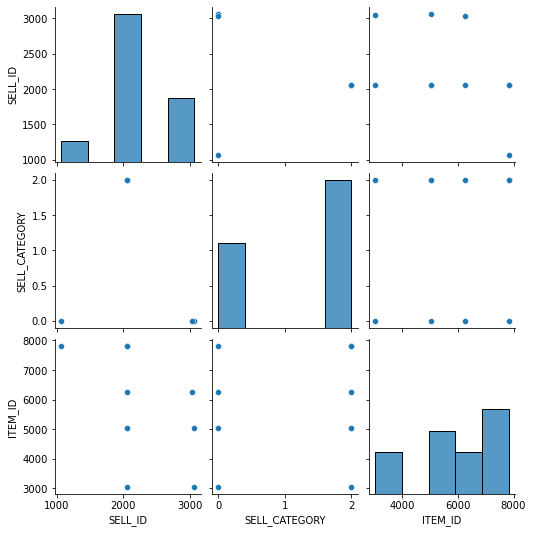

In [11]:
sns.pairplot(sold);

In [12]:
transactions.head()

,CALENDAR_DATE,PRICE,QUANTITY,SELL_ID,SELL_CATEGORY
0,01/01/12,15.50,46,1070,0
1,01/01/12,12.73,22,2051,2
2,01/01/12,12.75,18,2052,2
3,01/01/12,12.60,30,2053,2
4,01/02/12,15.50,70,1070,0


In [13]:
transactions.isnull().any()

CALENDAR_DATE    False
PRICE            False
QUANTITY         False
SELL_ID          False
SELL_CATEGORY    False
dtype: bool

In [14]:
transactions.shape

(5404, 5)

In [15]:
transactions.describe()

,PRICE,QUANTITY,SELL_ID,SELL_CATEGORY
count,5404.000000,5404.000000,5404.00000,5404.000000
mean,12.868729,44.335307,1806.50000,1.500000
std,1.563922,25.502597,425.25841,0.866106
min,10.120000,8.000000,1070.00000,0.000000
25%,11.530000,24.000000,1805.75000,1.500000
50%,12.640000,36.000000,2051.50000,2.000000
75%,13.557500,60.000000,2052.25000,2.000000
max,16.500000,124.000000,2053.00000,2.000000


In [16]:
transactions.describe(include = ['O'])

,CALENDAR_DATE
count,5404
unique,1348
top,03/01/13
freq,16


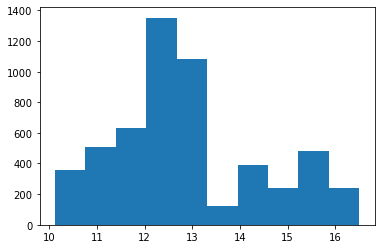

In [17]:
plt.hist(transactions.PRICE);

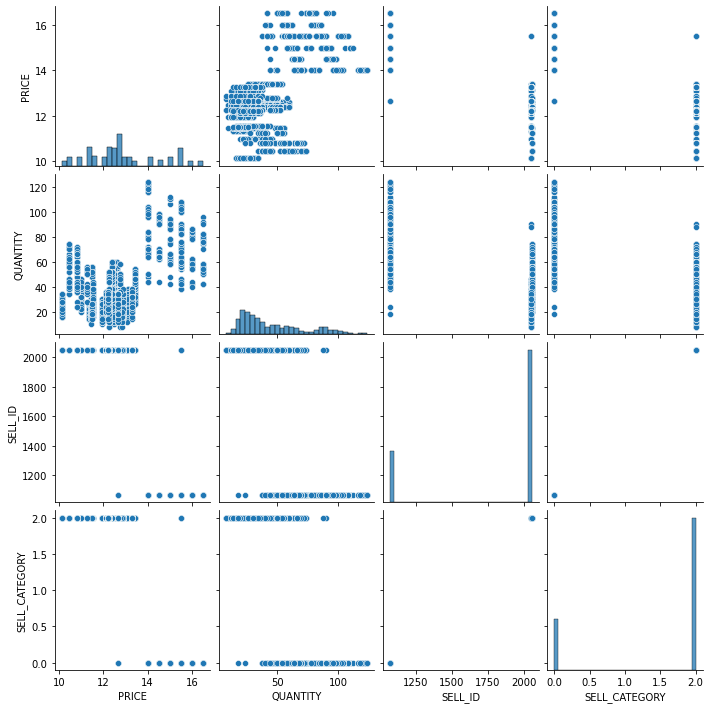

In [18]:
sns.pairplot(transactions);

In [19]:
date_info.head()

,CALENDAR_DATE,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
0,1/1/12,2012,New Year,1,0,24.8,0
1,1/2/12,2012,New Year,0,0,24.8,0
2,1/3/12,2012,New Year,0,0,32.0,1
3,1/4/12,2012,NaN,0,0,32.0,1
4,1/5/12,2012,NaN,0,0,24.8,0


In [20]:
date_info.shape

(1349, 7)

In [21]:
date_info.describe()

,YEAR,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
count,1349.000000,1349.000000,1349.000000,1349.000000,1349.000000
mean,2013.375093,0.285397,0.204596,56.326019,0.862120
std,1.073073,0.451771,0.403556,20.227597,0.344902
min,2012.000000,0.000000,0.000000,14.000000,0.000000
25%,2012.000000,0.000000,0.000000,35.600000,1.000000
50%,2013.000000,0.000000,0.000000,60.800000,1.000000
75%,2014.000000,1.000000,0.000000,75.200000,1.000000
max,2015.000000,1.000000,1.000000,87.800000,1.000000


In [22]:
date_info.describe(include = ['O'])

,CALENDAR_DATE,HOLIDAY
count,1349,105
unique,1348,8
top,3/1/13,Luner New Year
freq,2,28


In [25]:
date_info.isna().sum()

CALENDAR_DATE             0
YEAR                      0
HOLIDAY                1244
IS_WEEKEND                0
IS_SCHOOLBREAK            0
AVERAGE_TEMPERATURE       0
IS_OUTDOOR                0
dtype: int64

In [26]:
date_info.dtypes

CALENDAR_DATE           object
YEAR                     int64
HOLIDAY                 object
IS_WEEKEND               int64
IS_SCHOOLBREAK           int64
AVERAGE_TEMPERATURE    float64
IS_OUTDOOR               int64
dtype: object

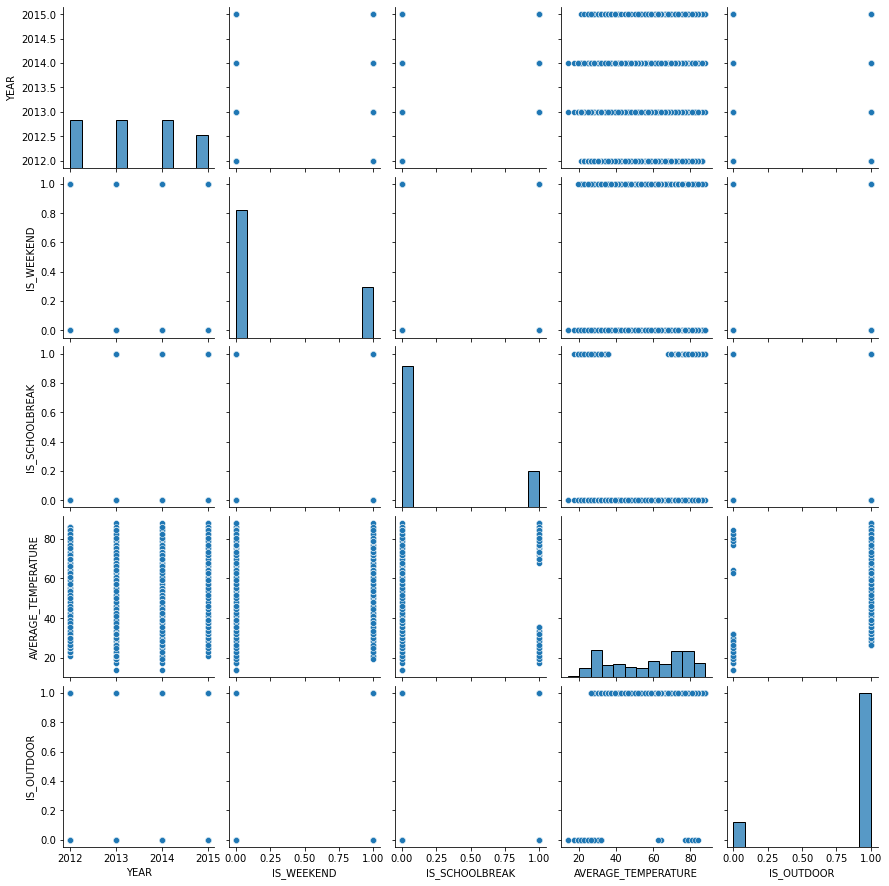

In [28]:
sns.pairplot(date_info);